In [3]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df=pd.read_csv('Advertising.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [7]:
stats = df.describe().T 

stats['variance'] = df.var()
stats['skewness'] = df.skew()
stats['kurtosis'] = df.kurtosis()

print(stats[['mean', '50%', 'std', 'variance', 'min', 'max', 'skewness', 'kurtosis']])

               mean     50%        std     variance  min    max  skewness  \
TV         147.0425  149.75  85.854236  7370.949893  0.7  296.4 -0.069853   
radio       23.2640   22.90  14.846809   220.427743  0.0   49.6  0.094175   
newspaper   30.5540   25.75  21.778621   474.308326  0.3  114.0  0.894720   
sales       14.0225   12.90   5.217457    27.221853  1.6   27.0  0.407571   

           kurtosis  
TV        -1.226495  
radio     -1.260401  
newspaper  0.649502  
sales     -0.408869  


<Figure size 1400x600 with 0 Axes>

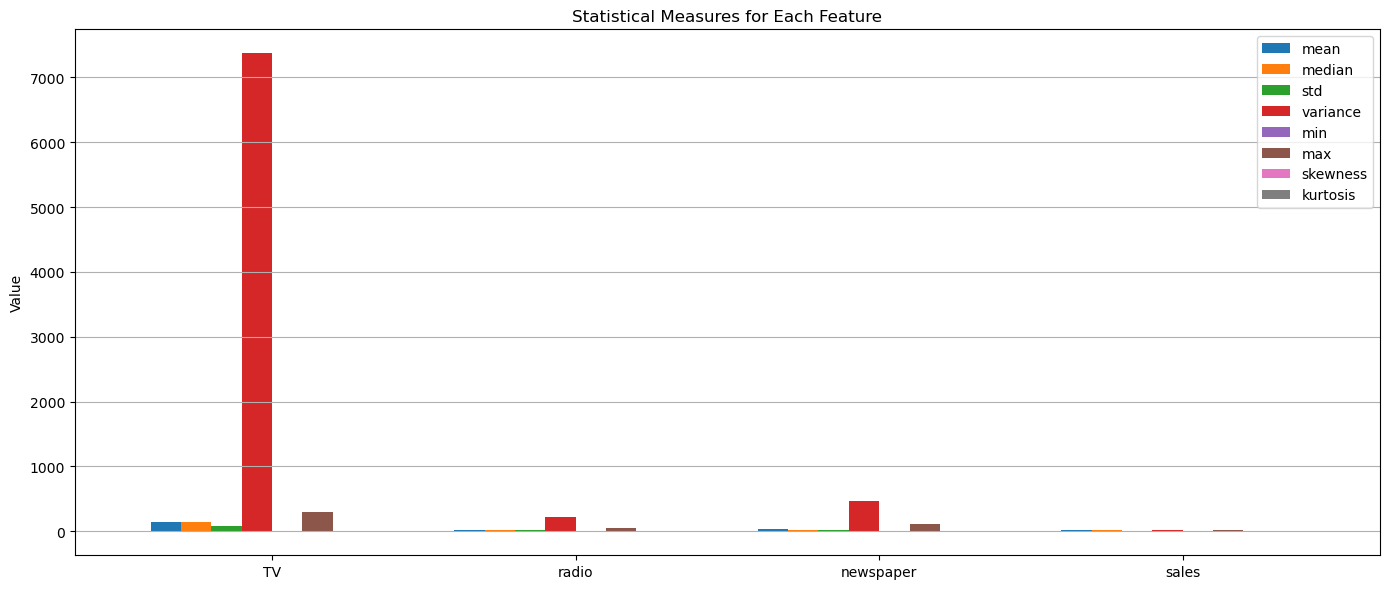

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

stats = df.describe().T
stats['median'] = df.median()
stats['variance'] = df.var()
stats['skewness'] = df.skew()
stats['kurtosis'] = df.kurtosis()

plot_stats = stats[['mean', 'median', 'std', 'variance', 'min', 'max', 'skewness', 'kurtosis']]

plt.figure(figsize=(14, 6))
plot_stats.plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title("Statistical Measures for Each Feature")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

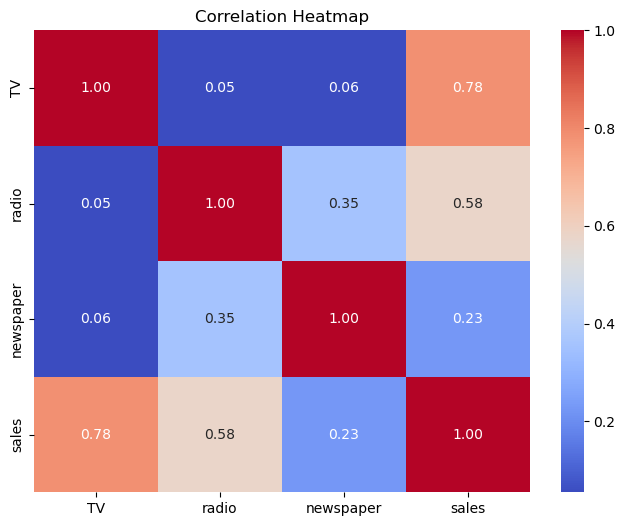


Variance Inflation Factor (VIF):
     Feature       VIF
0      const  6.848900
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# VIF calculation
X = add_constant(df.drop(columns=['sales']))  # Exclude target if applicable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

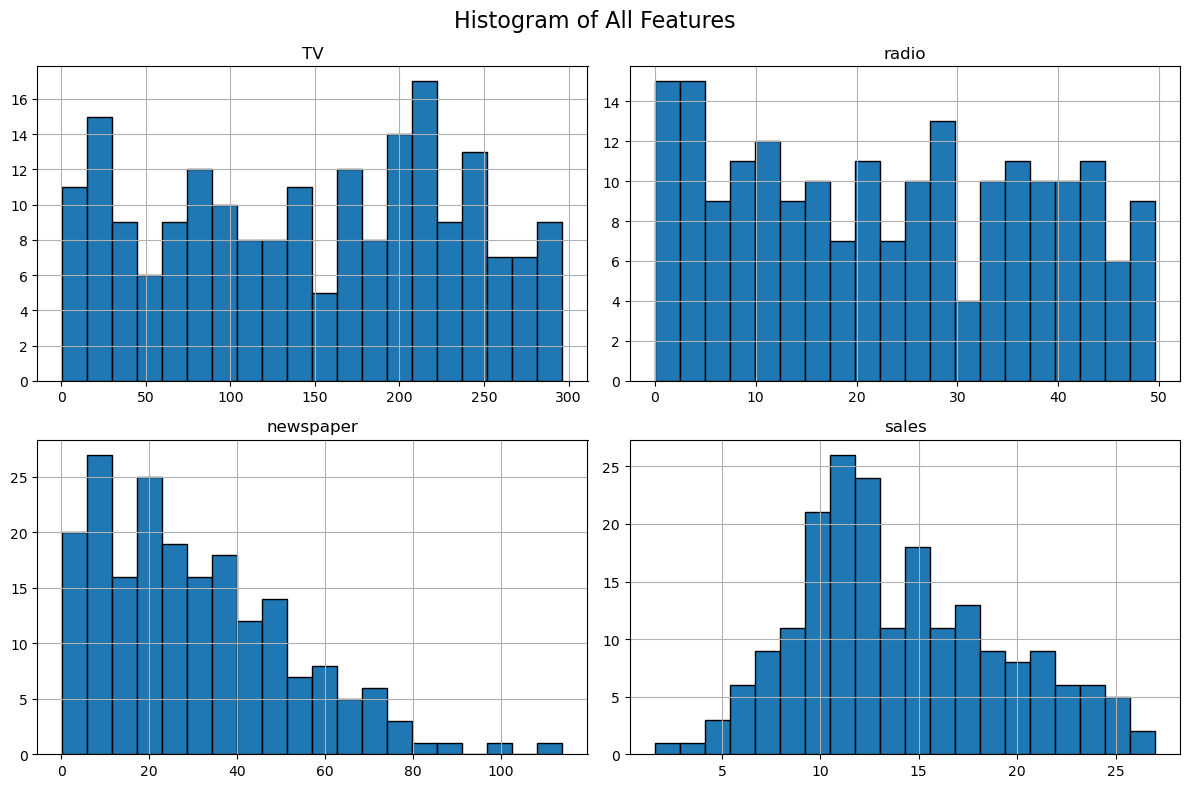

In [10]:
import matplotlib.pyplot as plt

# Histogram for all columns
df.hist(bins=20, figsize=(12, 8), grid=True, edgecolor='black')
plt.suptitle("Histogram of All Features", fontsize=16)
plt.tight_layout()
plt.show()

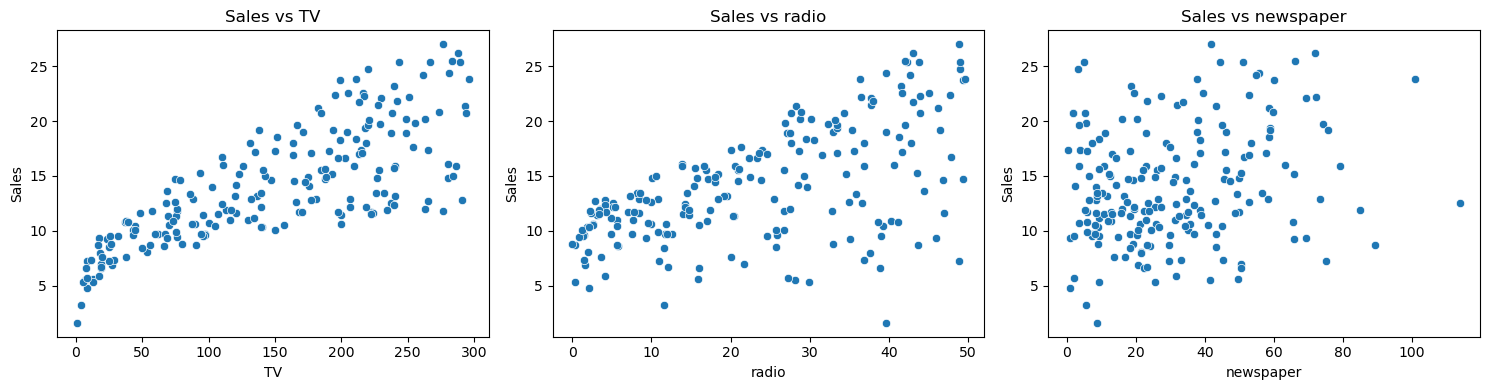

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
features = ['TV', 'radio', 'newspaper']
plt.figure(figsize=(15, 4))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['sales'])
    plt.title(f'Sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')

plt.tight_layout()
plt.show()

Train MSE: 2.7051
Test MSE: 3.1741
Test RMSE: 1.7816
Test MAE: 1.4608
Test R^2: 0.8994


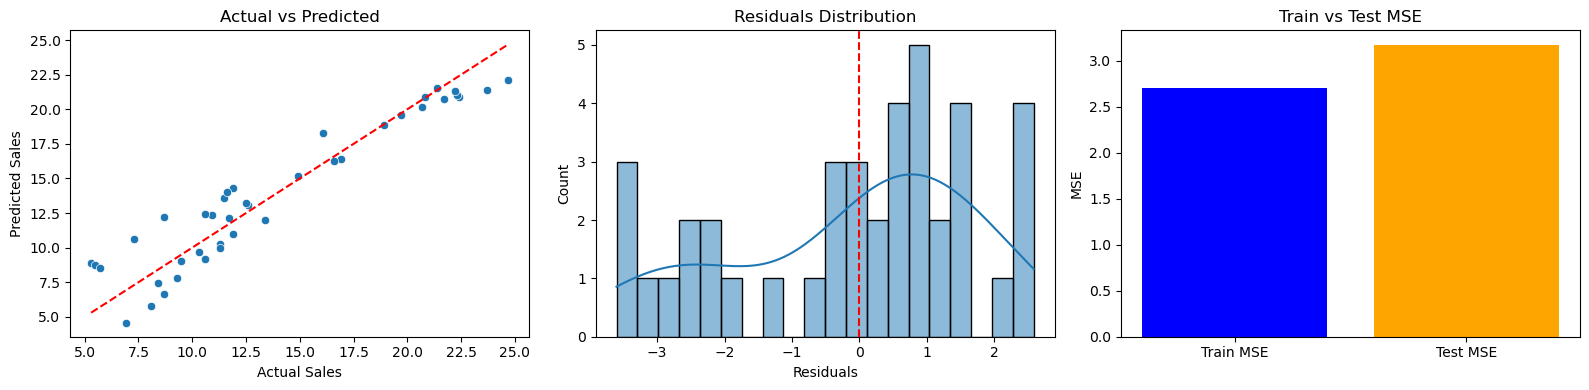

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse_test)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R^2: {r2:.4f}")

# Plot 1: Actual vs Predicted
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted")

# Plot 2: Residuals
residuals = y_test - y_test_pred
plt.subplot(1, 3, 2)
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.xlabel("Residuals")
plt.title("Residuals Distribution")

# Plot 3: Training vs Testing Loss (MSE)
plt.subplot(1, 3, 3)
plt.bar(['Train MSE', 'Test MSE'], [mse_train, mse_test], color=['blue', 'orange'])
plt.title("Train vs Test MSE")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()

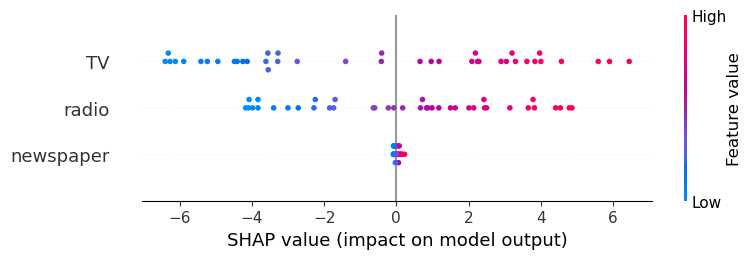

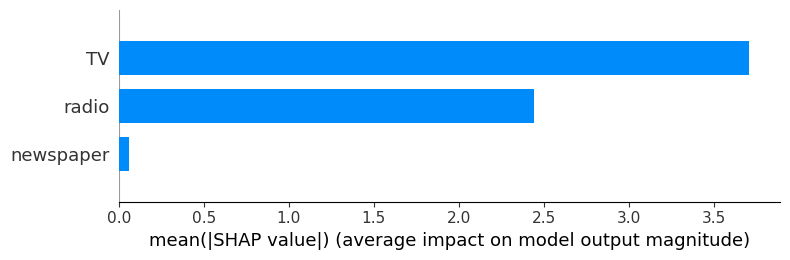

In [15]:
import shap

# Create a SHAP explainer
explainer = shap.LinearExplainer(model, X_train)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

# Optional: SHAP bar plot for global feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


--- Linear Regression using 'TV' only ---
Mean Squared Error (MSE): 10.2047
Root Mean Squared Error (RMSE): 3.1945
Mean Absolute Error (MAE): 2.4444
R^2 Score: 0.6767


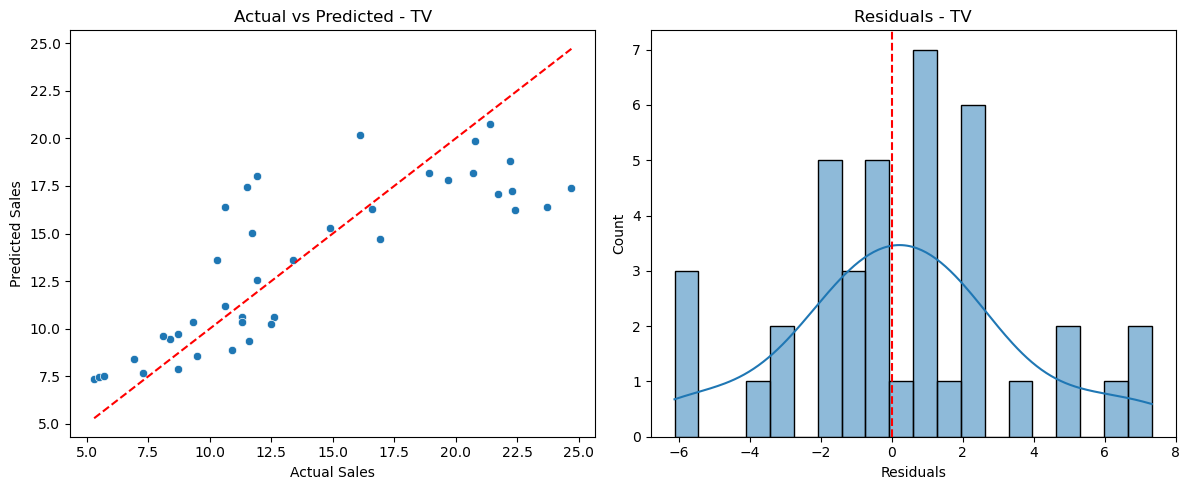

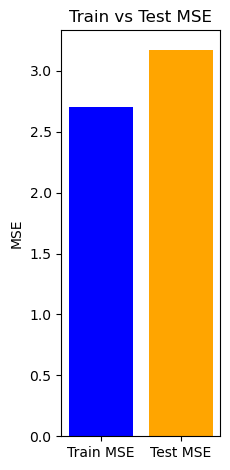


--- Linear Regression using 'radio' only ---
Mean Squared Error (MSE): 23.2488
Root Mean Squared Error (RMSE): 4.8217
Mean Absolute Error (MAE): 3.9299
R^2 Score: 0.2634


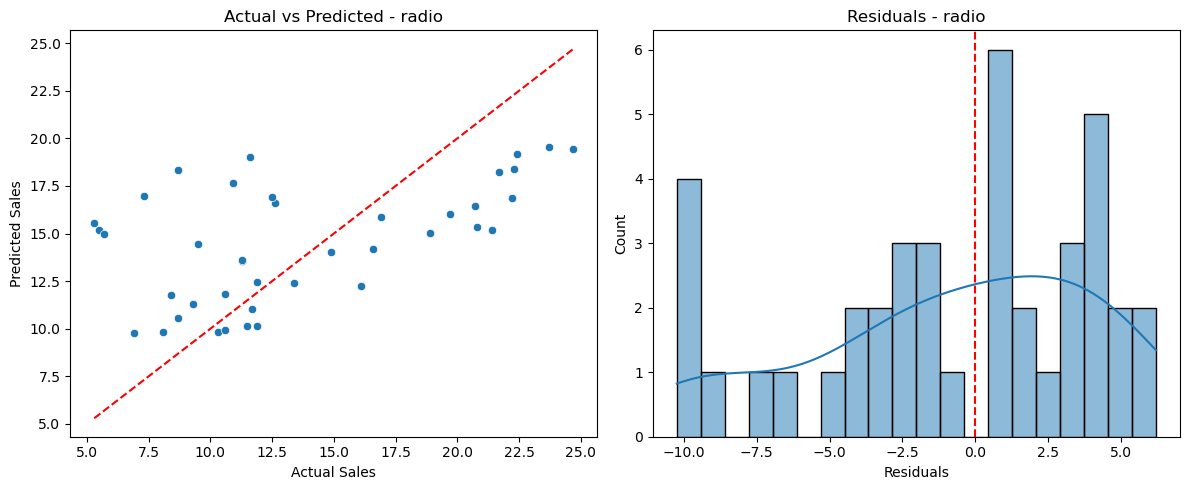

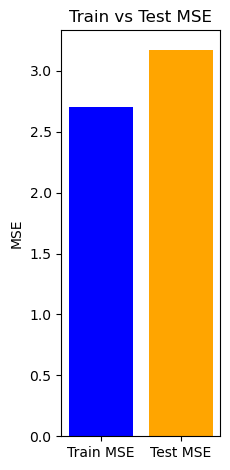


--- Linear Regression using 'newspaper' only ---
Mean Squared Error (MSE): 30.6207
Root Mean Squared Error (RMSE): 5.5336
Mean Absolute Error (MAE): 4.7822
R^2 Score: 0.0299


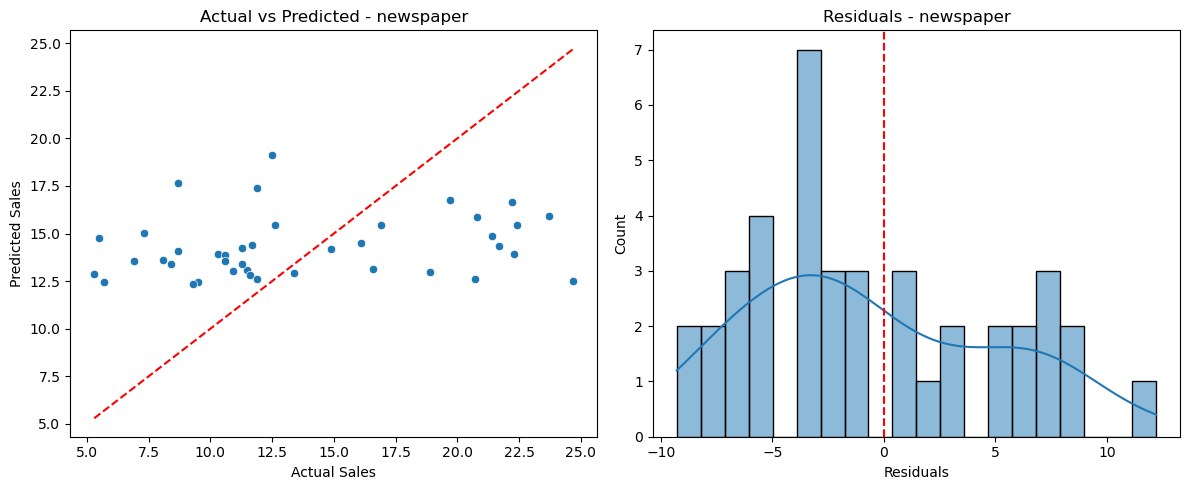

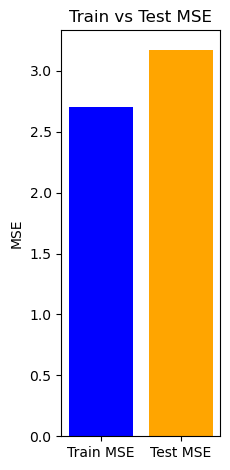

In [16]:
features = ['TV', 'radio', 'newspaper']

for feature in features:
    print(f"\n--- Linear Regression using '{feature}' only ---")
    
    X = df[[feature]]
    y = df['sales']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    
    # Plotting
    plt.figure(figsize=(12, 5))
    
    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"Actual vs Predicted - {feature}")
    
    # Residuals
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, bins=20, kde=True)
    plt.axvline(0, color='r', linestyle='--')
    plt.xlabel("Residuals")
    plt.title(f"Residuals - {feature}")
    
    plt.tight_layout()
    plt.show()

    plt.subplot(1, 3, 3)
    plt.bar(['Train MSE', 'Test MSE'], [mse_train, mse_test], color=['blue', 'orange'])
    plt.title("Train vs Test MSE")
    plt.ylabel("MSE")
    
    plt.tight_layout()
    plt.show()